In [ ]:
import numpy as np
import pandas as pd
import scipy
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.cluster.hierarchy import fcluster
from scipy.cluster.hierarchy import cophenet
from scipy.spatial.distance import pdist


from pylab import rcParams
import seaborn as sc
import matplotlib.pyplot as plt
  
import sklearn 
from sklearn.cluster import AgglomerativeClustering
import sklearn.metrics as sm


In [ ]:
  np.set_printoptions(precision = 4, suppress= True)
  plt.figure(figsize = (10,3))
  %matplotlib inline
  plt.style.use('seaborn-darkgrid') 

In [ ]:
from google.colab import drive
drive.mount ('/content/drive')

Mounted at /content/drive


In [ ]:
bankch = pd.read_csv('/content/drive/MyDrive/BankChurners.csv')

In [ ]:
df.columns = ['CLIENTNUM'	,'Attrition_Flag',	'Customer_Age',	'Gender'	,'Dependent_count',	'Education_Level'	,'Marital_Status',	'Income_Category' ,'Card_Category'	,'Months_on_book',	'Total_Relationship_Count',	'Months_Inactive_12_mon',	'Contacts_Count_12_mon'	,'Credit_Limit',	'Total_Revolving_Bal',	'Avg_Open_To_Buy'	,'Total_Amt_Chng_Q4_Q1',	'Total_Trans_Amt'	,'Total_Trans_Ct',	'Total_Ct_Chng_Q4_Q1'	,'Avg_Utilization_Ratio'	,'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1',	'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2']
X = df.iloc[:,[1,3,4]].values
Y = df.iloc[:,(9)].values

In [ ]:
df= pd.DataFrame(bankch, columns=['CLIENTNUM'	,'Attrition_Flag',	'Customer_Age',	'Gender'	,'Dependent_count',	'Education_Level'	,'Marital_Status',	'Income_Category' ,'Card_Category'	,'Months_on_book',	'Total_Relationship_Count',	'Months_Inactive_12_mon',	'Contacts_Count_12_mon'	,'Credit_Limit',	'Total_Revolving_Bal',	'Avg_Open_To_Buy'	,'Total_Amt_Chng_Q4_Q1',	'Total_Trans_Amt'	,'Total_Trans_Ct',	'Total_Ct_Chng_Q4_Q1'	,'Avg_Utilization_Ratio'	,'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1',	'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2'])

In [ ]:
bankch.head(2)

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.99991
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.99994


In [ ]:


df= df.drop(columns= ['Attrition_Flag', 'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2', 'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1'])

In [ ]:
from sklearn.preprocessing import normalize
data_scaled = normalize(bankch)
data_scaled = pd.DataFrame(data_scaled, columns=data.columns)
data_scaled.head()

ValueError: ignored

In [ ]:
 df['Marital_Status']= df['Marital_Status'].astype('category').cat.codes

In [ ]:
df['Gender']=df['Gender'].astype('category').cat.codes

In [ ]:
df['Education_Level']= df['Education_Level'].astype('category').cat.codes

In [ ]:
X

array([['Existing Customer', 'M', 3],
       ['Existing Customer', 'F', 5],
       ['Existing Customer', 'M', 3],
       ...,
       ['Attrited Customer', 'F', 1],
       ['Attrited Customer', 'M', 2],
       ['Attrited Customer', 'F', 2]], dtype=object)

In [ ]:
Y

array([39, 44, 36, ..., 36, 36, 25])

In [ ]:
Z = linkage (X, 'ward')

ValueError: ignored

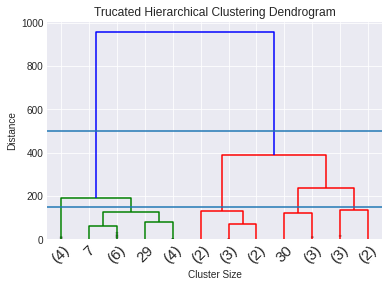

In [ ]:
dendrogram(Z, truncate_mode='lastp', p = 12, leaf_rotation=45., leaf_font_size=15., show_contracted=True )
plt.title('Trucated Hierarchical Clustering Dendrogram')
plt.xlabel('Cluster Size')
plt.ylabel('Distance')

plt.axhline(y=500)
plt.axhline(y=150)

plt.show()


In [ ]:
K=2
Hclustering = AgglomerativeClustering(n_clusters=K, affinity='euclidean', linkage ='ward')
Hclustering.fit(X)
sm.accuracy_score(Y, Hclustering.labels_)

0.78125

In [ ]:
K=2
Hclustering = AgglomerativeClustering(n_clusters=K, affinity='euclidean', linkage ='complete')
Hclustering.fit(X)
sm.accuracy_score(Y, Hclustering.labels_)

0.4375

In [ ]:
K=2
Hclustering = AgglomerativeClustering(n_clusters=K, affinity='euclidean', linkage ='average')
Hclustering.fit(X)
sm.accuracy_score(Y, Hclustering.labels_)

0.78125

In [ ]:
K=2
Hclustering = AgglomerativeClustering(n_clusters=K, affinity='manhattan', linkage ='average')
Hclustering.fit(X)
sm.accuracy_score(Y, Hclustering.labels_)

0.71875